# Library

In [1]:
library(amen)
library(ggplot2)

# Read network data as undirected

In [2]:
# Read the edge list from a CSV file
df_edges <- read.csv("enron_agg.csv", header = TRUE)
num_nodes = max(c(df_edges$source,df_edges$target))
A <- matrix(0, nrow = num_nodes, ncol = num_nodes)

# Fill in the adjacency matrix
for (i in 1:nrow(df_edges)) {
  from_node <- df_edges[i, 1] 
  to_node <- df_edges[i, 2]
  A[from_node, to_node] <- 1
  # If the graph is undirected, uncomment the following line
  A[to_node, from_node] <- 1
}

# Run latent factor model

In [3]:
start_time <- Sys.time()

fit<-ame(A, family="bin", R = 2,
         symmetric=TRUE,intercept = TRUE,
         
         # No Covariates
         Xdyad=NULL, Xrow=NULL, Xcol=NULL,
         # No mixed effects
         cvar = FALSE,  nvar=FALSE,dcor=FALSE,rvar=FALSE,
         
         # THIS SHOULD BE MUCH LONGER
         burn=100,nscan=5100,odens=100,
         plot=FALSE,print=FALSE,gof=FALSE)

# End timing
end_time <- Sys.time()

# Calculate the difference
time_taken <- end_time - start_time
print(paste("Time taken to run the code: ", time_taken, " seconds"))

[1] "Time taken to run the code:  7.90930916070938  seconds"


# Latent positions

In [4]:
df_U <- data.frame(
  x = fit$U[,1],
  y = fit$U[,2],
  label = paste("", 1:num_nodes)
)

#df_V <- data.frame(
#  x = fit$V[,1],
#  y = fit$V[,2],
#  label = paste("", 1:num_nodes)
#)


# Plot

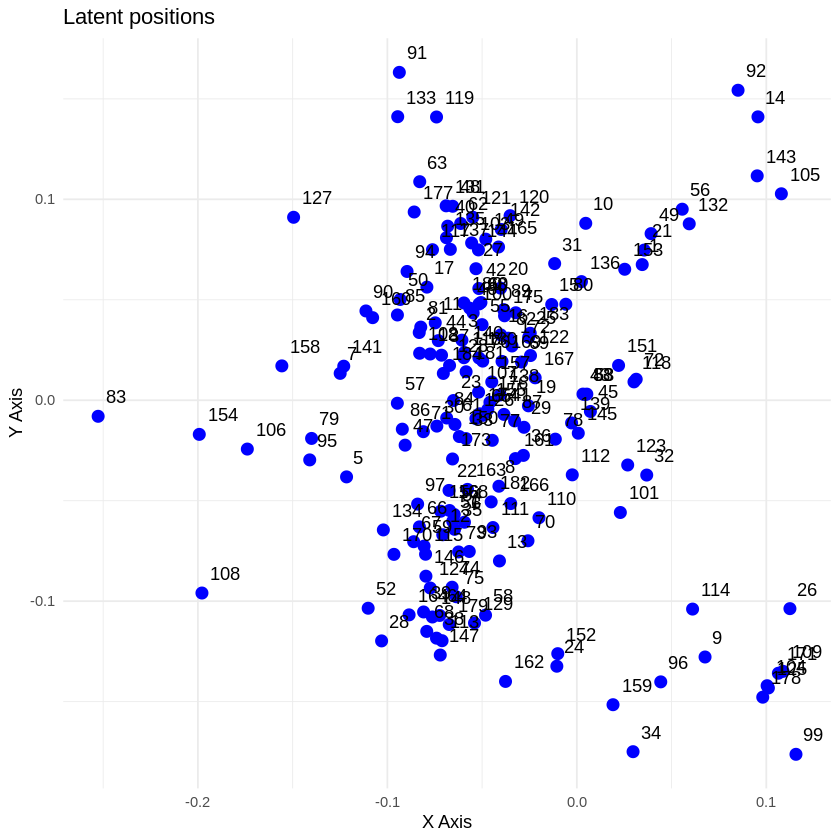

In [6]:
# Create a scatterplot with annotations
ggplot(df_U, aes(x = x, y = y, label = label)) +
  geom_point(color = "blue", size = 3) +  # Draw points
  geom_text(aes(label=label), vjust = -1, hjust = -0.1) +  # Add text annotations
  theme_minimal() +  # Use a minimal theme
  labs(title = "Latent positions", x = "X Axis", y = "Y Axis")  # Add labels